# Chapter 1_6 泊松回归
----
Author: W.Y.  
Date: 2020/1/15  
Update: 2020/2/5  
Info: 王汉生老师书的第六章，泊松回归的python极简实现  

----

In [1]:
# 导入模块

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  

In [2]:
# 导入数据

data = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_6 泊松回归\CH 1_6 data crm.csv')

In [3]:
# 预览数据

data.head()

,exp3,exp2,exp1,freq3,freq2,freq1,freq0
0,45.4,0.0,0.0,1,0,0,0
1,79.6,9.8,0.0,2,2,0,3
2,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,0.0,0,0,0,0
4,2.1,0.0,0.0,1,0,0,2


In [4]:
# 描述性分析

df_describe = pd.concat([data.mean(),data.min(), 
                         data.median(),data.max(),
                         data.std()], axis=1)
df_describe.columns = ['mean', 'min', 'median', 'max', 'std']  # 重命名列名
df_describe

,mean,min,median,max,std
exp3,16.482553,0.0,0.0,184.9,24.918920
exp2,9.241151,0.0,0.0,159.1,16.621235
exp1,7.916971,0.0,0.0,151.0,16.151223
freq3,1.161452,0.0,0.0,14.0,1.713073
freq2,1.176721,0.0,0.0,12.0,1.737624
freq1,0.843805,0.0,0.0,13.0,1.403420
freq0,0.686108,0.0,0.0,11.0,1.225090


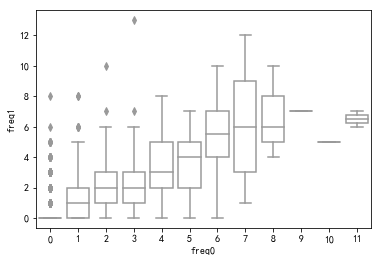

In [5]:
# 箱图

matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

sns.boxplot(x='freq0',y='freq1',data=data, color='white')  


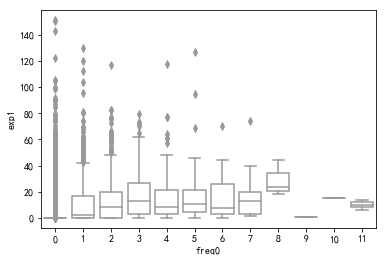

In [6]:
sns.boxplot(x='freq0',y='exp1',data=data, color='white') 

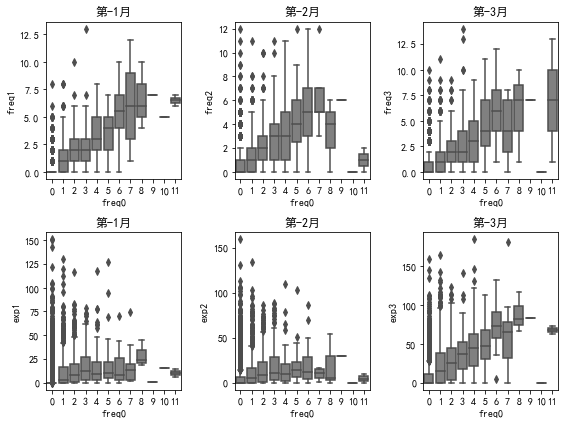

In [7]:
# 箱图 （多图一起画）

fig = plt.figure(figsize=(8, 6))
sns.boxplot(x=data['freq0'],y=data['freq1'], color='grey',  
            ax=plt.subplot(2,3,1)).set_title("第-1月")
sns.boxplot(x=data['freq0'],y=data['freq2'], color='grey', 
            ax=plt.subplot(2,3,2)).set_title("第-2月")
sns.boxplot(x=data['freq0'],y=data['freq3'], color='grey',  
            ax=plt.subplot(2,3,3)).set_title("第-3月")
sns.boxplot(x=data['freq0'],y=data['exp1'], color='grey', 
            ax=plt.subplot(2,3,4)).set_title("第-1月")
sns.boxplot(x=data['freq0'],y=data['exp2'], color='grey',  
            ax=plt.subplot(2,3,5)).set_title("第-2月")
sns.boxplot(x=data['freq0'],y=data['exp3'], color='grey', 
            ax=plt.subplot(2,3,6)).set_title("第-3月")
fig.tight_layout()

In [8]:
# 泊松回归

model1 = smf.poisson('freq0 ~ freq1 + freq2 + freq3 + '
                     'exp1 + exp2 + exp3', data).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 1.007964
         Iterations 10
                          Poisson Regression Results                          
Dep. Variable:                  freq0   No. Observations:                 3995
Model:                        Poisson   Df Residuals:                     3988
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2104
Time:                        12:12:53   Log-Likelihood:                -4026.8
converged:                       True   LL-Null:                       -5099.8
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1382      0.031    -37.288      0.000      -1.198      -1.078
freq1          0.1792      0

In [9]:
# 预测

data_new = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_6 泊松回归\CH 1_6 data new.csv')
data_new.head()

In [11]:
data_new['predict'] = model1.predict(data_new)
data_new.head()

In [13]:
# 绝对预测误差

np.sqrt(np.mean((data_new['freq0']-data_new['predict'])**2))



1.344686326903291